In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
np.random.seed(0)
ROOT = Path("")

In [3]:
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/sparsified/all_results_df.csv")

In [4]:
len(df)

188340

In [5]:
df.head()

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_from_checkpoint_1ba77_00000_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1,0.1,0.230278,0.1
1,NN_tune_trainable_from_checkpoint_1ba77_00001_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1,0.1,0.230276,0.1
2,NN_tune_trainable_from_checkpoint_1ba77_00003_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1,0.1,0.230276,0.1
3,NN_tune_trainable_from_checkpoint_1ba77_00004_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1,0.1,NaN,0.1
4,NN_tune_trainable_from_checkpoint_1ba77_00005_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1,0.1,0.230312,0.1


<Axes: >

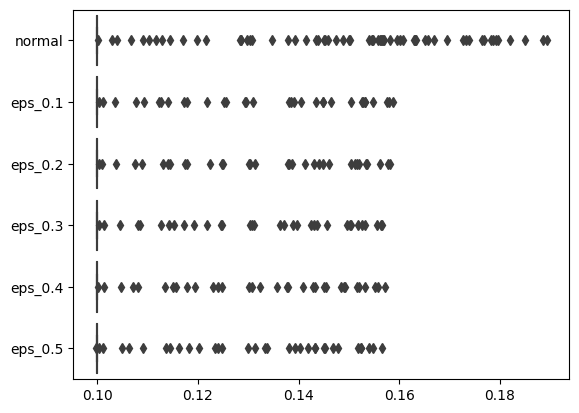

In [6]:
eps = [.1, .2, .3, .4, .5]

aux_df = df[(df.dataset == "CIFAR10") & (df.attack == "PGD") & (df.setup == "hyp-10-r")]
both_results = pd.DataFrame()

for i, e in enumerate(eps):

    eps_df = aux_df[aux_df.eps == e].sort_values(by="name").reset_index(drop=True)

    both_results["normal"] = eps_df["old_acc"]
    both_results[f"eps_{e}"] = eps_df["new_acc"]

# sns.displot(data=both_results[["normal", "eps_0.1"]], kde=True)
sns.boxplot(both_results, orient="h")

In [8]:
both_results.normal.value_counts()

0.1000    1143
0.1546       1
0.1144       1
0.1651       1
0.1564       1
          ... 
0.1631       1
0.1285       1
0.1632       1
0.1582       1
0.1283       1
Name: normal, Length: 67, dtype: int64

In [8]:
df.new_acc.value_counts()

0.195874    58607
0.100000    33482
0.113500    22837
0.066994     6284
0.097400     4077
            ...  
0.338500        1
0.716200        1
0.479900        1
0.228800        1
0.133835        1
Name: new_acc, Length: 13536, dtype: int64

In [27]:
df[df.old_acc=="(0.92,)"]

,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
15,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019619,0.2724
21,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.018843,0.2733
73,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.018729,0.2670
74,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.020664,0.2544
115,NN_tune_trainable_0ecbc_00488_488_seed=489_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,489,0.303,"(0.92,)",0.020058,0.2585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.021218,0.2081
9812,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.019995,0.2226
9839,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.020388,0.2267
9863,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019261,0.2319


In [29]:
df[df.old_acc=="(0.92,)"].iloc[0, 13]

AttributeError: 'str' object has no attribute 'dtype'

In [40]:
s = '0.7,'
s[:-1]

'0.7'

In [36]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].startswith("("):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][1:5]

In [41]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].endswith(","):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][:-1]

In [43]:
df = df.astype({"old_acc": "float64"})

In [44]:
df.to_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet/all_results_resnet_df.csv", index=False)
        

In [49]:
def return_names_for_path(dataset, setup):
    if dataset=="CIFAR10":
        size = "large"
    else:
        size = "small"
    
    if setup == "seed":
        zoo_p = f"cnn_{size}_{dataset.lower()}_ard"
    elif setup == "hyp-10-f":
        zoo_p = f"cnn_{size}_{dataset.lower()}_fixed_ard"
    else: 
        zoo_p = f"cnn_{size}_{dataset.lower()}_rand_ard"

    return zoo_p

In [50]:
results_root = os.path.join(ROOT, "/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet")

In [51]:
df = pd.read_csv(os.path.join(results_root, "all_results_resnet_df.csv"))

In [70]:
kendall_df = pd.DataFrame(columns=["ds", "attack", "kendalls_tau", "p-value"])
datasets = ["CIFAR10", "CIFAR100", "TinyImageNet"]
for i, ds in enumerate(datasets):
    
    aux_df = df[(df.dataset==ds) & (df.attack=="PGD") & (df.eps==0.1)]
    aux_df[["name", "old_acc", "new_acc"]]
    
    perturbed_df = aux_df.sort_values("new_acc", ascending=False)
    aux_df = aux_df.sort_values("old_acc", ascending=False)
    
    perturbed_df.insert(0, "order", range(1, 1+len(perturbed_df)))
    aux_df.insert(0, "order", range(1, 1+len(aux_df)))
    
    # Sort perturbed_df according to names of aux_df again
    aux_list = list(aux_df.name)
    perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: aux_list.index(e)), inplace=True)

    
    # Calculating kendall's tau
    tau, p_value = stats.kendalltau(aux_df["order"], perturbed_df["order"])
    print(f"Tau-value: {tau}, p-value: {p_value}")
    kendall_df.loc[i, "ds"] = ds
    kendall_df.loc[i, "attack"] = "PGD"
    kendall_df.loc[i, "kendalls_tau"] = tau
    kendall_df.loc[i, "p-value"] = p_value

Tau-value: -0.04207007007007007, p-value: 0.04636315021175537
Tau-value: 0.0042922922922922924, p-value: 0.8389430917356812
Tau-value: 0.012272563546884298, p-value: 0.5605695208691802


In [71]:
kendall_df

,ds,attack,kendalls_tau,p-value
0,CIFAR10,PGD,-0.04207,0.046363
1,CIFAR100,PGD,0.004292,0.838943
2,TinyImageNet,PGD,0.012273,0.56057


In [69]:
aux_df.head()

,order,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
572,1,NN_tune_trainable_0ecbc_00676_676_seed=677_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,677,0.291,0.926,0.019661,0.2603
403,2,NN_tune_trainable_0ecbc_00493_493_seed=494_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,494,0.295,0.926,0.019534,0.2625
846,3,NN_tune_trainable_0ecbc_00792_792_seed=793_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,793,0.297,0.926,0.020993,0.2485
22,4,NN_tune_trainable_0ecbc_00039_39_seed=40_2022-...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,40,0.306,0.926,0.020406,0.2677
577,5,NN_tune_trainable_0ecbc_00388_388_seed=389_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,389,0.300,0.925,0.019300,0.2778
